In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1, as_frame=False, parser="auto")
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
import numpy as np
y = y.astype(np.uint8)

In [5]:
m, n = X.shape
for i in range(m):
    for j in range(n):
        if X[i, j] != 0:
            X[i, j] = 1

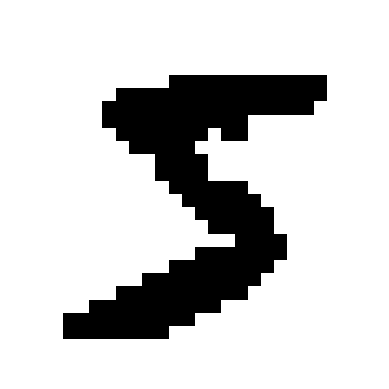

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [12]:
import joblib
joblib.dump(sgd_clf, "model.pkl")

['model.pkl']

In [13]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_pred = sgd_clf.predict([some_digit])
print(some_digit_pred)
print(some_digit_scores)

[8]
[[-1197.44810127 -1638.9225881   -605.70170342  -291.55027601
  -1491.9695446   -282.88378133 -1396.72730327 -1466.9654508
   -216.58308862  -910.65855932]]


In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.886 , 0.8871, 0.8928])

In [57]:
from sklearn.metrics import mean_squared_error
final_predictions = sgd_clf.predict(X_test)
rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(rmse)

4.027604747241218
